### 1. Introduction to the data set

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [3]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


cars = pd.read_csv("imports-85.data", names=col_names)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Only using numeric features to predict target variable: Price

In [4]:
drop_col = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors",
            "body-style", "drive-wheels", "engine-location", "engine-type",
            "num-of-cylinders", "fuel-system", "engine-size"]
num_cars = cars.drop(columns=drop_col,axis=1)
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Data Cleaning

Replacing "?" with NaN

In [5]:
num_cars = num_cars.replace('?', np.nan)
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Checking data type of each column

In [6]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


Converting columns with non-numeric data type to numeric

In [7]:
num_cars = num_cars.astype('float')

In [8]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


Checking missing values of each column

In [9]:
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Filling missing values with mean

In [10]:
num_cars['normalized-losses'] = num_cars.fillna(num_cars['normalized-losses'].mean())

In [11]:
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Since price is the target variable with 4 missing value, we drop those 4 rows.

In [12]:
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Filling missing values of other columns

In [13]:
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Normalizing all numeric columns

In [14]:
num_cars_features = num_cars.drop(columns='price',axis=1)
num_cars_features.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [15]:
normalized_cars = (num_cars_features - num_cars_features.mean())/num_cars_features.std()
normalized_cars['price'] = num_cars['price']
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


### 3. Univariate Model

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.

    This function should split the data set into a training and test set.
    Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    Finally, it should calculate the RMSE and return that value.

In [17]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [18]:
features = normalized_cars.columns.drop('price')
rmse = {}
for item in features:
    rmse[item] = knn_train_test(item, 'price', normalized_cars)

results = pd.Series(rmse)
results.sort_values()

horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
length               5429.644740
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

It looks like the univarate model yields the smallest rmse with horsepower.

Modify the knn_train_test() function you wrote to accept a parameter for the k value.

    Update the function logic to use this parameter.
    For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.


In [22]:
def knn_train_test2(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(1)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[features]], train_df[[target_col]])
        
        #test
        predictions = knn.predict(test_df[[features]])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [23]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = [1, 3, 5, 7, 9]
features = normalized_cars.columns.drop('price')
feature_k_rmse = {}

for item in features:
    feature_k_rmse[item] = knn_train_test2(item, 'price', normalized_cars, k)
    
feature_k_rmse

{'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018},
 'city-mpg': {1: 5901.143574354764,
  3: 4608.180446380397,
  5: 4754.637378183515,
  7: 5035.456896910003,
  9: 5333.1616578530175},
 'compression-rate': {1: 8083.070177540802,
  3: 7379.623321663306,
  5: 6606.571345933599,
  7: 6732.032905446027,
  9: 7019.9512505224375},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'highway-mpg': {1: 6025.594966720739,
  3: 4627.908507167689,
  5: 4625.047587445843,
  7: 4722.975580907234,
  9: 5201.019510000462},
 'horsepower': {1: 4170.054848037801,
  3: 4010.5218032337666,
  5: 4047.376554982472,
  7: 4383.729138557079,
  9: 4505.9694416104885},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

peak-rpm
average_rmse: 8078.8223746725
city-mpg
average_rmse: 5126.5159907363395
width
average_rmse: 4678.052062707216
length
average_rmse: 5156.973124965849
highway-mpg
average_rmse: 5040.509230448393
bore
average_rmse: 7213.387242726885
compression-rate
average_rmse: 7164.249800221235
curb-weight
average_rmse: 4743.330761209847
wheel-base
average_rmse: 5252.436178721009
height
average_rmse: 8159.606697635715
stroke
average_rmse: 7993.732370042334
horsepower
average_rmse: 4223.530357284321
normalized-losses
average_rmse: 7619.681739188098


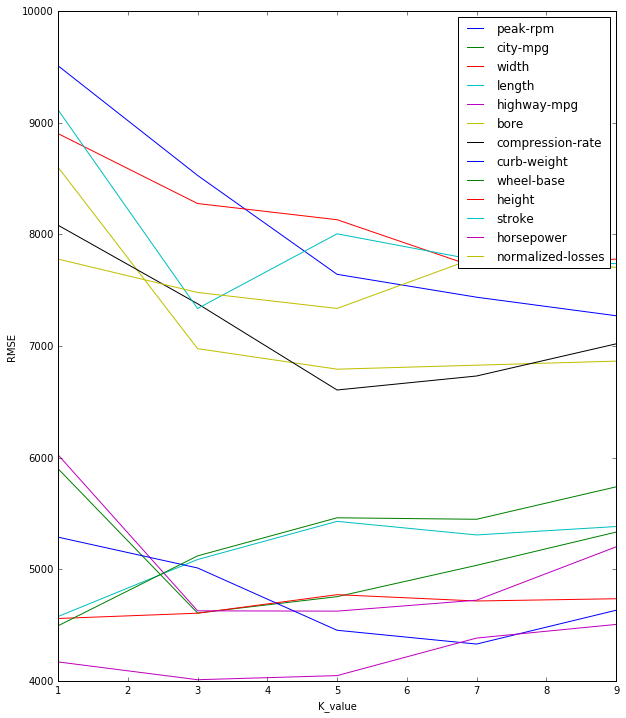

In [26]:
best_features = {}
plt.figure(figsize=(10, 12))

for key, value in feature_k_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    print(key)
    print('average_rmse: '+str(np.mean(y)))
    best_features[key] = np.mean(y)

    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:

    Instead of using just a single column for train and test, use all of the columns passed in.
    Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).


In [29]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'city-mpg',
 'length',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

In [30]:
def knn_train_test3(features, target_col, df):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    #training
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[features], train_df[[target_col]])
    #test
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse**0.5
    return rmse

In [31]:
k_rmse_features ={}

best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]


k_rmse_features["best_two_rmse"]  = knn_train_test3(best_two_features, 'price', normalized_cars)
k_rmse_features["best_three_rmse"] = knn_train_test3(best_three_features, 'price', normalized_cars)
k_rmse_features["best_four_rmse"] = knn_train_test3(best_four_features, 'price', normalized_cars)
k_rmse_features["best_five_rmse"] = knn_train_test3(best_five_features, 'price', normalized_cars)

In [32]:
k_rmse_features

{'best_five_rmse': 3533.482622563806,
 'best_four_rmse': 3401.2884123170697,
 'best_three_rmse': 3196.2707137605794,
 'best_two_rmse': 3637.7577704453665}

In [33]:
def knn_train_test4(features, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    randomed_index = np.random.permutation(df.index)
    randomed_df = df.reindex(randomed_index)
    
    half_point = int(len(randomed_df)/2)
    
    #assign test and training sets
    train_df = randomed_df.iloc[0:half_point]
    test_df = randomed_df.iloc[half_point:]
    
    k_rmse = {}
    #training
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[features], train_df[[target_col]])
        #test
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse**0.5
        k_rmse[k] = rmse
    return k_rmse

In [34]:
#input k parameter as a list, use function to return a dictionary of dictionaries
k = list(range(1,25))
features = [best_three_features, best_four_features, best_five_features]
feature_k_rmse2 = {}
feature_k_rmse2["best_three_features"] = knn_train_test4(best_three_features, 'price', normalized_cars, k)
feature_k_rmse2["best_four_features"] = knn_train_test4(best_four_features, 'price', normalized_cars, k)
feature_k_rmse2["best_five_features"] = knn_train_test4(best_five_features, 'price', normalized_cars, k)

In [35]:
feature_k_rmse2

{'best_five_features': {1: 2935.9954457433587,
  2: 2940.098051422809,
  3: 3171.1889277716587,
  4: 3437.329268307355,
  5: 3533.482622563806,
  6: 3590.9366815393837,
  7: 3663.088172124572,
  8: 3602.20742919299,
  9: 3590.000307407701,
  10: 3762.805225328887,
  11: 3750.3224268664976,
  12: 3824.956716483965,
  13: 3833.1355872973227,
  14: 3837.749759936532,
  15: 3789.8269251041297,
  16: 3811.846792270701,
  17: 3856.1041132647756,
  18: 3888.908116308746,
  19: 3906.251283093287,
  20: 3962.0684528787524,
  21: 3986.7177559004385,
  22: 4037.6061108729245,
  23: 4062.2248350010595,
  24: 4082.3476016752256},
 'best_four_features': {1: 2858.759514264192,
  2: 2923.48363377165,
  3: 3179.1202059419493,
  4: 3442.2827085624904,
  5: 3401.2884123170697,
  6: 3484.072169776829,
  7: 3608.2912487079143,
  8: 3565.5556526304495,
  9: 3594.213353994177,
  10: 3690.6173672417117,
  11: 3619.177878932166,
  12: 3622.1088554761286,
  13: 3705.1981164331874,
  14: 3795.2935143374234,
  15

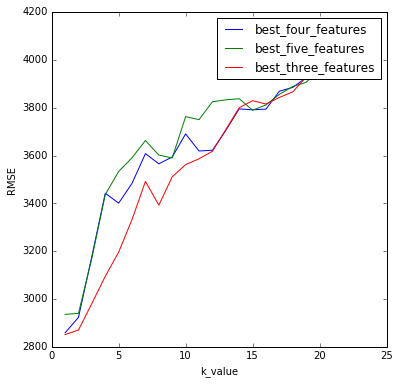

In [36]:
plt.figure(figsize=(6, 6))

for key, value in feature_k_rmse2.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

It looks like the best k value is k = 2, it gives the lowest rmse.